<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تفریحی
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
   در این پروژه هدف ما پیش‌بینی دلیل سفر کاربران بر اساس اطلاعات مربوط به خرید و بلیط است. کاربران مستربلیط ممکن است بلیط را با هدف کاری (Work) یا تفریحی (Int) رزرو کنند. دانستن دلیل سفر می‌تواند به شخصی‌سازی پیشنهادها، پیام‌ها و کمپین‌های بازاریابی کمک کند؛ برای مثال پیشنهاد بیمه/هتل/تور، یا ارائه پیشنهادهای مرتبط با سفرهای کاری مانند خدمات سازمانی. بنابراین مسئله را می‌توان یک مسئله‌ی یادگیری نظارت‌شده (Supervised Learning) از نوع طبقه‌بندی (Classification) در نظر گرفت که در آن متغیر هدف TripReason و ورودی‌ها مجموعه‌ای از ویژگی‌های زمانی، مالی و رفتاری کاربر و سفارش هستند.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
توصیف داده‌ها و چالش‌های مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
داده‌ی آموزشی شامل حدود ۱۰۰ هزار رکورد است و برای هر بلیط اطلاعاتی مانند زمان ثبت، زمان حرکت، وضعیت کنسلی، قیمت، تخفیف، مبدا/مقصد، نوع وسیله نقلیه و… ارائه شده است. داده‌ی تست نیز ساختاری مشابه دارد اما ستون هدف TripReason را ندارد و باید مقدار آن پیش‌بینی شود.
<br>
چالش‌های اصلی این مسئله عبارت‌اند از:
<br>
ویژگی‌های زمانی (Created, DepartureTime, CancelTime)
زمان‌ها به شکل خام معمولاً برای مدل قابل استفاده نیستند، بنابراین باید به ویژگی‌های معنی‌دار تبدیل شوند (مثل فاصله زمانی تا حرکت یا ماه حرکت).
<br>
ویژگی‌های دسته‌ای با تعداد مقادیر زیاد (مثل From/To/Vehicle/ReserveStatus و…)
این ستون‌ها باید به شکل عددی تبدیل شوند (Encoding) تا برای مدل قابل استفاده باشند.
<br>
وجود مقادیر گمشده و داده‌های غیرمنطقی
مثل VehicleClass خالی، تخفیف‌های منفی، یا قیمت‌های نامعتبر که باید پاکسازی شوند تا باعث افت کیفیت مدل نشوند.
<br>
ساختار سفارش و چند بلیطی بودن یک خرید
هر BillID ممکن است چند بلیط داشته باشد؛ بنابراین استخراج الگوهای سفارش می‌تواند اطلاعات مهمی درباره هدف سفر بدهد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مجموعه داده آموزشی شامل ۱۰۱۰۱۷ سطر است که در جدول زیر، توضیحات هر ستون آمده است.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|Created|زمان ثبت بلیط|
|CancelTime|زمانی که مسافر بلیط را کنسل کرده است|
|DepartureTime|زمان حرکت|
|BillID|شناسه خرید|
|TicketID|شناسه بلیط|
|ReserveStatus|وضعیت پرداخت مشتری|
|UserID|شناسه کاربری|
|Male|آیا بلیط متعلق به زن است یا مرد|
|Price|قیمت بلیط بدون تخفیف|
|CouponDiscount|تخفیفی که شخص روی بلیط اعمال کرده است|
|From|مبدا سفر|
|To|مقصد سفر|
|Domestic|آیا سفر، داخلی است یا خارجی|
|VehicleType|جزئیات وسیله نقلیه را مشخص می‌کند|
|VehicleClass|آیا وسیله نقلیه، فرست‌کلس است یا نه|
|Vehicle|نوع وسیله نقلیه|
|Cancel|آیا بلیط کنسل شده‌است یا نه|
|HashPassportNumber_p|هش‌شده شماره پاسپورت|
|HashEmail|هش‌شده ایمیل|
|BuyerMobile|هش‌شده شماره موبایل|
|NationalCode|هش‌شده شماره‌ملی|
|TripReason|دلیل سفر|
    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    مجموعه داده آزمایش نیز مانند مجموعه آموزش است با این تفاوت که ستون <code>TripReason</code> که متغیر هدف مسئله است را در خود ندارد. مجموعه داده آزمایش ۴۳۲۹۳ سطر دارد.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی و دلیل انتخاب آن
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
<br>
برای ارزیابی عملکرد مدل از معیار F1-Score استفاده می‌شود. F1 ترکیبی از Precision و Recall است و زمانی مناسب است که:
<br>
عدم توازن کلاس‌ها وجود داشته باشد (مثلاً یکی از دلایل سفر بیشتر رخ دهد)،
یا هزینه‌ی خطا در هر دو جهت مهم باشد (هم شناسایی درست سفر کاری و هم تفریحی اهمیت دارد).
به همین دلیل F1 معیار مناسبی برای سنجش کیفیت مدل در این مسئله است و علاوه بر دقت، به «تعادل در پیش‌بینی‌ها» نیز توجه می‌کند.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
رویکرد حل مسئله در فاز اول
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
برای رسیدن به یک مدل قابل دفاع، فرآیند کار به صورت زیر طراحی شده است:
<br>
<br>
1) تحلیل اکتشافی داده (EDA)
<br>
ابتدا داده بررسی می‌شود تا:
<br>
توزیع کلاس‌های TripReason مشخص شود،
میزان مقادیر گمشده و ستون‌های مشکل‌دار شناسایی شود،
رفتار ویژگی‌های عددی مانند Price و CouponDiscount تحلیل شود،
و روابط احتمالی بین ویژگی‌ها و دلیل سفر پیدا شود.
این مرحله به ما کمک می‌کند پیش‌پردازش‌ها و مهندسی ویژگی‌ها را آگاهانه انتخاب کنیم.
<br>
<br>
2) پیش‌پردازش و پاکسازی
<br>
اقدامات اصلی شامل:
<br>
حذف ستون‌های شناسنامه‌ای یا کم‌اثر (مثل هش‌ها و شناسه‌ها) برای جلوگیری از نویز و حفظ حریم خصوصی،
مدیریت مقادیر گمشده (مثلاً پر کردن VehicleClass با مقدار مد)،
اصلاح و پاکسازی ویژگی‌های مالی (حذف/اصلاح قیمت‌های نامعتبر و تخفیف‌های غیرمنطقی)،
و نرمال‌سازی ویژگی‌های عددی مثل Price برای کمک به مدل‌های حساس به مقیاس.
<br>
<br>
3) مهندسی ویژگی (Feature Engineering)
<br>
برای افزایش قدرت مدل، ویژگی‌های زیر ساخته می‌شود:
<br>
TicketPerOrder: تعداد بلیط‌های ثبت‌شده در هر خرید (BillID)
چون سفرهای خانوادگی یا گروهی معمولاً چند بلیط دارند و ممکن است با نوع سفر مرتبط باشد.
<br>
family: تشخیص سفارش‌هایی که هم مسافر زن و هم مرد دارند
این ویژگی با هدف捕 کردن الگوی «سفر خانوادگی» ساخته شده است که می‌تواند به نوع سفر نزدیک باشد.
<br>
Departure_Created: فاصله زمانی بین ثبت بلیط و زمان حرکت
چون سفر کاری ممکن است نزدیک‌تر به زمان حرکت رزرو شود یا برعکس، این فاصله می‌تواند سیگنال مهمی باشد.
<br>
DepartureMonth: ماه حرکت
فصل‌ها و تعطیلات می‌توانند بر احتمال تفریحی بودن سفر اثرگذار باشند.
<br>
Discount: وجود یا عدم وجود تخفیف
استفاده از تخفیف ممکن است الگوی رفتاری خاصی در سفرهای تفریحی یا کاری ایجاد کند.
<br>
<br>
4) مدل‌سازی و مقایسه چند مدل
<br>
در ادامه چند مدل رایج طبقه‌بندی آموزش داده می‌شود تا بهترین گزینه انتخاب شود، از جمله:
<br>
Logistic Regression
<br>
KNN
<br>
Random Forest
<br>
XGBoost
<br>
این مقایسه به ما کمک می‌کند مدل نهایی را بر اساس عملکرد واقعی انتخاب کنیم، نه صرفاً بر اساس حدس.
</font>
</p>

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)

train_data = pd.read_csv('../data/train_data.csv')
train_data

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,From,To,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-10-23 09:38:49.110,NaN,2022-11-02 23:59:00,39710203,1091777.0,5,122885.0,True,6600000.0,34425.0,گرگان,تهران,1,NaN,False,Work,Plane,0,NaN,66c7f29e3b92f3b77e20830ac29e7758037a53d2238a5b...,764974891906,477368495
1,2022-08-15 14:51:43.160,NaN,2022-08-18 04:15:00,38689463,1070902.0,5,876925.0,True,9500000.0,0.0,مشهد,تهران,1,NaN,False,Int,Plane,0,NaN,b24634843858a4175d03422aa9e7211ec3b9f3ce4c481c...,27479149496,15987669
2,2022-09-20 17:25:27.250,NaN,2022-09-21 11:00:00,39245173,7624237.0,3,916640.0,False,2000000.0,0.0,شیراز,اهواز,1,VIP 2+1,True,Work,Bus,0,NaN,NaN,323657282999,667640412
3,2022-06-25 11:32:53.980,NaN,2022-06-26 08:30:00,37957585,2867547.0,2,NaN,False,40000.0,0.0,تبریز,جلفا,1,3 ستاره اتوبوسي,NaN,Int,Train,0,NaN,NaN,169459057632,392476186
4,2022-06-01 11:30:53.633,NaN,2022-06-02 23:00:00,37584530,7212559.0,3,NaN,True,1130000.0,0.0,تهران,نجف آباد (اصفهان ),1,اسکانیا تک صندلی ۳۱نفره,True,Int,Bus,0,NaN,NaN,408595008421,79497837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101012,2022-06-01 00:20:14.280,NaN,2022-06-04 12:10:00,37579327,1050781.0,5,NaN,True,5900000.0,0.0,شیراز,کیش,1,بوئینگ 737,False,Int,Plane,0,NaN,NaN,605105141718,103215806
101013,2022-10-29 20:54:31.330,NaN,2022-11-01 15:30:00,39789479,3085407.0,2,403095.0,True,926500.0,0.0,میانه,تهران,1,4 ستاره اتوبوسي نگين,NaN,Work,Train,0,NaN,NaN,414997568556,193262890
101014,2022-09-03 17:57:22.067,NaN,2022-09-13 09:30:00,38991563,2322052.0,5,528307.0,True,30000000.0,0.0,نجف,تهران,0,NaN,False,Int,InternationalPlane,0,47b8f2d9b5de7e0e0e7234c18a1aa0c4b35798e6cb46b4...,a4dcb7941ee3c8f7b1fc6a171015692bc961d65a84ad47...,99460830937,34732401
101015,2022-09-29 13:15:51.303,NaN,2022-09-29 17:30:00,39406503,7664730.0,3,797946.0,True,980000.0,0.0,اصفهان,یزد,1,25 نفره (VIP),True,Work,Bus,0,NaN,718bc52c3e88520531463b385998a1193e2821d518b60b...,487489926847,458338866


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<br>
تحلیل اکتشافی EDA
</font>
</h2>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
EDA 1) توزیع کلاس هدف (TripReason)
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این بخش توزیع کلاس هدف TripReason بررسی می‌شود. این نمودار خیلی مهم است چون اگر کلاس‌ها نامتوازن باشند (مثلاً تعداد سفرهای تفریحی خیلی بیشتر از کاری باشد)، انتخاب معیار ارزیابی (مثل F1)، استفاده از Stratify در split و حتی تنظیم class_weight یا روش‌های بالانس‌سازی اهمیت پیدا می‌کند. همچنین از همین‌جا یک تصویر اولیه از سختی مسئله می‌گیریم.
</font>
</p>

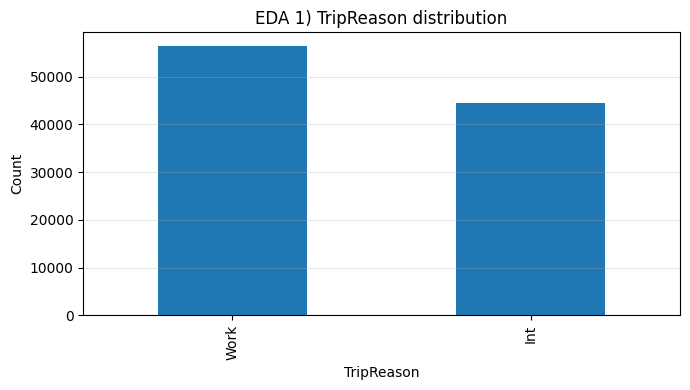

In [63]:
df = train_data.copy()
df["TripReason"] = df["TripReason"].astype(str)

plt.figure(figsize=(7,4))
df["TripReason"].value_counts().plot(kind="bar")
plt.title("EDA 1) TripReason distribution")
plt.xlabel("TripReason")
plt.ylabel("Count")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
EDA 2) توزیع قیمت نهایی به تفکیک TripReason (Boxplot)
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این بخش بررسی می‌کنیم آیا قیمت پرداختی می‌تواند سیگنال مناسبی برای تشخیص نوع سفر باشد یا نه. چون Price به‌تنهایی ممکن است با تخفیف‌ها گمراه‌کننده شود، ابتدا قیمت نهایی را به‌شکل FinalPrice = Price - CouponDiscount می‌سازیم.
از آنجایی که قیمت‌ها معمولاً توزیع کج (Skewed) دارند، از log(1+FinalPrice) استفاده می‌کنیم تا مقایسه‌ی دو کلاس در نمودار جعبه‌ای معنی‌دارتر شود.</font>
</p>

/tmp/ipykernel_54517/3897449940.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_box, labels=classes)


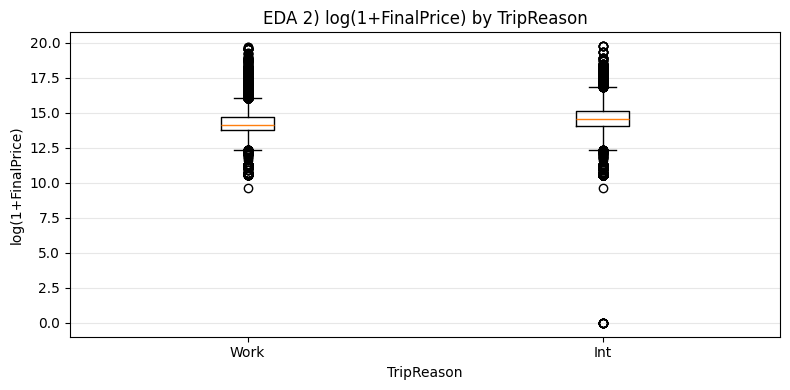

In [64]:
df = train_data.copy()
df["TripReason"] = df["TripReason"].astype(str)

# ساخت قیمت نهایی
if "Price" in df.columns and "CouponDiscount" in df.columns:
    df["CouponDiscount_clean"] = df["CouponDiscount"].fillna(0).clip(lower=0)
    df["FinalPrice"] = (df["Price"] - df["CouponDiscount_clean"]).clip(lower=0)
elif "Price" in df.columns:
    df["FinalPrice"] = df["Price"].clip(lower=0)
else:
    df["FinalPrice"] = np.nan

tmp = df[["TripReason", "FinalPrice"]].dropna()
tmp["LogFinalPrice"] = np.log1p(tmp["FinalPrice"])

plt.figure(figsize=(8,4))
classes = tmp["TripReason"].unique()
data_for_box = [tmp.loc[tmp["TripReason"] == cls, "LogFinalPrice"].values for cls in classes]
plt.boxplot(data_for_box, labels=classes)
plt.title("EDA 2) log(1+FinalPrice) by TripReason")
plt.xlabel("TripReason")
plt.ylabel("log(1+FinalPrice)")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
EDA 3) فاصله زمانی تا حرکت (LeadTimeDays) به تفکیک TripReason
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
اینجا رفتار رزرو از نظر زمان ثبت تا زمان حرکت بررسی می‌شود. ویژگی LeadTimeDays می‌تواند یکی از بهترین سیگنال‌ها باشد، چون الگوی رزرو سفر کاری و تفریحی ممکن است متفاوت باشد (مثلاً سفر کاری نزدیک‌تر به حرکت رزرو شود یا برعکس).
همچنین برای جلوگیری از خراب شدن نمودار با داده‌های پرت، مقادیر غیرمنطقی (کمتر از صفر) حذف می‌شوند و یک سقف پرت‌ها (مثلاً صدک ۹۹) اعمال می‌کنیم.</font>
</p>

/tmp/ipykernel_54517/2630893942.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_box, labels=classes)


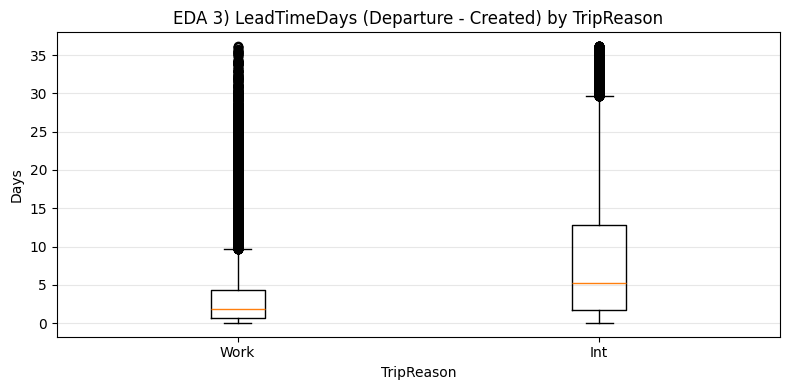

In [65]:
df = train_data.copy()
df["TripReason"] = df["TripReason"].astype(str)

# datetime ها
for c in ["Created", "DepartureTime"]:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors="coerce")

# ساخت LeadTimeDays
if "Created" in df.columns and "DepartureTime" in df.columns:
    df["LeadTimeDays"] = (df["DepartureTime"] - df["Created"]).dt.total_seconds() / (3600 * 24)
else:
    df["LeadTimeDays"] = np.nan

tmp = df[["TripReason", "LeadTimeDays"]].dropna()
tmp = tmp[(tmp["LeadTimeDays"] >= 0)]
tmp = tmp[tmp["LeadTimeDays"] <= tmp["LeadTimeDays"].quantile(0.99)]

plt.figure(figsize=(8,4))
classes = tmp["TripReason"].unique()
data_for_box = [tmp.loc[tmp["TripReason"] == cls, "LeadTimeDays"].values for cls in classes]
plt.boxplot(data_for_box, labels=classes)
plt.title("EDA 3) LeadTimeDays (Departure - Created) by TripReason")
plt.xlabel("TripReason")
plt.ylabel("Days")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
EDA 4) ارتباط Vehicle با TripReason (نسبتی/نرمال‌شده)
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این بخش بررسی می‌کنیم که برای هر نوع وسیله نقلیه (Vehicle)، سهم هر کلاس از TripReason چقدر است. برای این کار از جدول توافقی (Crosstab) با نرمال‌سازی سطری استفاده می‌کنیم تا خروجی به‌صورت درصد/نسبت باشد، نه تعداد خام.
اگر برای بعضی وسیله‌ها سهم یکی از کلاس‌ها خیلی بیشتر باشد، این ستون می‌تواند یک ویژگی دسته‌ای بسیار مهم برای مدل باشد.
</font>
</p>

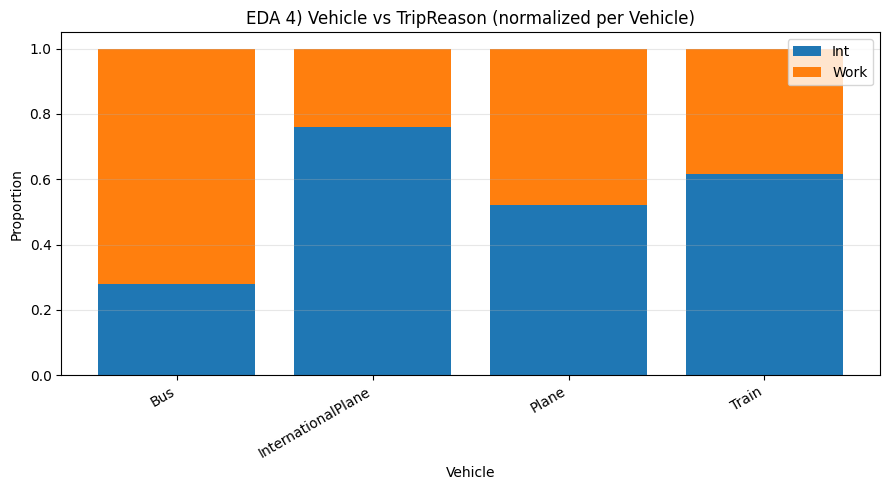

In [66]:
df = train_data.copy()
df["TripReason"] = df["TripReason"].astype(str)

if "Vehicle" not in df.columns:
    raise ValueError("Column 'Vehicle' not found in train_data")

ct = pd.crosstab(df["Vehicle"], df["TripReason"], normalize="index")

plt.figure(figsize=(9,5))
bottom = np.zeros(len(ct))
x = np.arange(len(ct.index))

for col in ct.columns:
    plt.bar(x, ct[col].values, bottom=bottom, label=col)
    bottom += ct[col].values

plt.title("EDA 4) Vehicle vs TripReason (normalized per Vehicle)")
plt.xlabel("Vehicle")
plt.ylabel("Proportion")
plt.xticks(x, ct.index, rotation=30, ha="right")
plt.grid(True, axis="y", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
EDA 5) نمونه EDA نامناسب: بررسی طول HashEmail
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
این بخش عمداً به‌عنوان یک نمونه EDA کم‌ارزش/نامناسب آورده می‌شود. ستون‌هایی مثل HashEmail (هش‌شده) معمولاً طوری ساخته می‌شوند که الگوی معنی‌دار برای پیش‌بینی ارائه نکنند و صرفاً نقش شناسایی/حریم خصوصی دارند.
بنابراین بررسی طول هش (که غالباً ثابت یا نزدیک به ثابت است) هیچ بینش مفیدی برای مدل یا مسئله ایجاد نمی‌کند و حتی ممکن است ما را به تحلیل‌های بی‌اثر سوق دهد.
</font>
</p>

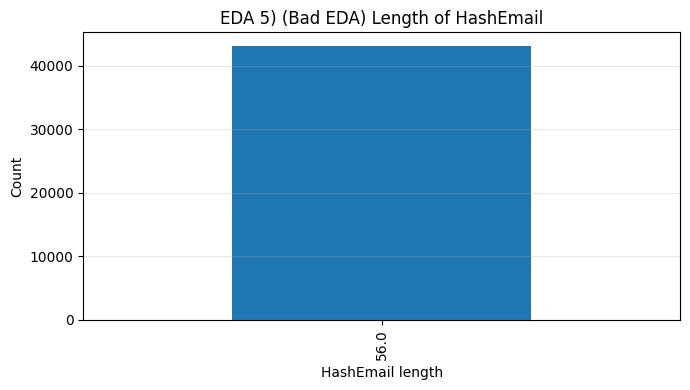

In [67]:
df = train_data.copy()

if "HashEmail" not in df.columns:
    raise ValueError("Column 'HashEmail' not found in train_data")

lens = df["HashEmail"].astype(str).str.len()
vc = lens.value_counts().sort_index()

plt.figure(figsize=(7,4))
vc.plot(kind="bar")
plt.title("EDA 5) (Bad EDA) Length of HashEmail")
plt.xlabel("HashEmail length")
plt.ylabel("Count")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۱) بررسی توزیع متغیر هدف (TripReason) </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> قبل از شروع مدل‌سازی، لازم است توزیع کلاس‌های متغیر هدف را بررسی کنیم. این کار به ما نشان می‌دهد آیا داده نامتوازن است یا خیر. اگر یک کلاس تعداد نمونه بیشتری داشته باشد، مدل ممکن است به سمت همان کلاس غالب متمایل شود و نتیجه‌گیری با معیارهایی مثل Accuracy گمراه‌کننده شود. به همین دلیل در این پروژه از معیار <code>F1-Score</code> استفاده می‌کنیم که تعادل بهتری بین Precision و Recall ایجاد می‌کند. </font> </p>

In [68]:
train_data['TripReason'].value_counts()


TripReason
Work    56448
Int     44569
Name: count, dtype: int64

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۲) بررسی تعداد مقادیر یکتا (nunique) </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> در این مرحله تعداد مقادیر یکتای هر ستون را بررسی می‌کنیم تا: <br> - ستون‌های با تنوع بسیار بالا (مثل شناسه‌ها یا مقادیر شبه‌هش) را شناسایی کنیم، <br> - تصمیم بگیریم کدام ستون‌ها ارزش یادگیری دارند و کدام ستون‌ها فقط نویز ایجاد می‌کنند، <br> - و در نهایت برای انتخاب روش مناسب کدگذاری (Encoding) و نحوه برخورد با ویژگی‌های دسته‌ای بهتر تصمیم بگیریم. </font> </p>

In [69]:
train_data.nunique()


Created                  72359
CancelTime               11826
DepartureTime            31073
BillID                   72359
TicketID                100938
ReserveStatus                4
UserID                   15217
Male                         2
Price                     4229
CouponDiscount            1991
From                       226
To                         307
Domestic                     2
VehicleType               3108
VehicleClass                 2
TripReason                   2
Vehicle                      4
Cancel                       2
HashPassportNumber_p       726
HashEmail                16657
BuyerMobile              43698
NationalCode             66649
dtype: int64

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۳) مهندسی ویژگی: TicketPerOrder (تعداد بلیط در هر سفارش) </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> هر خرید با شناسه <code>BillID</code> ممکن است شامل چند بلیط باشد. تعداد بلیط‌ها در یک سفارش می‌تواند الگوی رفتاری سفر را نشان دهد؛ برای مثال سفرهای خانوادگی یا گروهی معمولاً چند بلیط دارند و ممکن است با تفریحی بودن سفر مرتبط باشند. بنابراین یک ویژگی جدید به نام <code>TicketPerOrder</code> می‌سازیم که تعداد بلیط‌های هر سفارش را نمایش می‌دهد. </font> </p>

In [70]:
train_data['TicketPerOrder'] = train_data.groupby('BillID').TicketID.transform('count')


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۴) مهندسی ویژگی: family (تشخیص سفر خانوادگی) </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> در این بخش تلاش می‌کنیم سفارش‌هایی را شناسایی کنیم که در آن‌ها هم بلیط متعلق به مرد و هم بلیط متعلق به زن وجود دارد. ایده این است که وجود هر دو جنسیت در یک خرید می‌تواند نشانه‌ای از سفر خانوادگی باشد. در نهایت یک ویژگی بولی (True/False) به نام <code>family</code> ایجاد می‌کنیم تا این الگو به شکل عددی/منطقی وارد مدل شود. </font> </p>

In [71]:
li = train_data.groupby('BillID')['Male'].unique().index
iter = 0
all = list()

train_data['family'] = False

for i in train_data.groupby('BillID')['Male'].unique():
    if set(i) == {True, False}:
        all.append(li[iter])
    iter += 1

for i in all:
    train_data.loc[train_data['BillID'] == i, 'family'] = True


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۵) حذف ستون‌های غیرضروری و شناسه‌ای </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> برخی ستون‌ها مانند <code>BillID</code>، <code>TicketID</code>، <code>UserID</code> و ستون‌های هش‌شده معمولاً برای پیش‌بینی علت سفر الگوی مفیدی ایجاد نمی‌کنند و بیشتر نقش شناسه دارند. این نوع ستون‌ها ممکن است باعث افزایش نویز، پیچیدگی و حتی overfitting شوند. بنابراین این ستون‌ها حذف می‌شوند تا مدل روی ویژگی‌های معنی‌دارتر تمرکز کند. </font> </p>

In [72]:
train_data.drop(columns=['BillID', 'TicketID', 'UserID', 'HashPassportNumber_p',
                         'HashEmail', 'NationalCode', 'VehicleType'], inplace=True)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۶) بررسی مقادیر گمشده (Missing Values) </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> وجود مقدارهای گمشده (<code>NaN</code>) می‌تواند باعث خطا در مراحل بعدی (مانند Encoding یا مدل‌سازی) شود یا کیفیت مدل را کاهش دهد. در این مرحله تعداد مقدارهای گمشده هر ستون را بررسی می‌کنیم تا مشخص شود: <br> - کدام ستون‌ها نیاز به پر کردن دارند، <br> - و بهترین روش پر کردن برای هر ستون چیست. </font> </p>

In [73]:
train_data.isna().sum()

Created               0
CancelTime        85691
DepartureTime         0
ReserveStatus         0
Male                  0
Price                 0
CouponDiscount        0
From                  0
To                    0
Domestic              0
VehicleClass      38450
TripReason            0
Vehicle               0
Cancel                0
BuyerMobile           0
TicketPerOrder        0
family                0
dtype: int64

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۷) پر کردن VehicleClass با مقدار مد (Mode) </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> در ستون <code>VehicleClass</code> تعدادی مقدار گمشده وجود دارد. برای جلوگیری از حذف تعداد زیادی از داده‌ها و همچنین جلوگیری از ایجاد خطا در مدل‌سازی، مقدارهای گمشده را با مقدار <b>مد</b> (بیشترین مقدار تکرارشونده) پر می‌کنیم. این روش معمولاً برای ویژگی‌های دسته‌ای/بولی انتخاب مناسبی است. </font> </p>

In [74]:
mode_vehicle_class = train_data['VehicleClass'].mode()[0]
train_data['VehicleClass'] = train_data['VehicleClass'].fillna(mode_vehicle_class)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۸) تبدیل ستون‌های زمانی به datetime </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> ستون‌های <code>Created</code>، <code>CancelTime</code> و <code>DepartureTime</code> به صورت رشته هستند. برای اینکه بتوانیم ویژگی‌های زمانی استخراج کنیم (مثل اختلاف روزها یا ماه حرکت)، باید آن‌ها را به نوع داده‌ای <code>datetime</code> تبدیل کنیم. این مرحله پیش‌نیاز مهندسی ویژگی‌های زمانی است. </font> </p>

In [75]:
columns = ['Created', 'CancelTime', 'DepartureTime']
for column in columns:
    train_data[column] = pd.to_datetime(train_data[column])

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۹) تحلیل اختلاف CancelTime و Created (تحلیل کمکی) </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> در این بخش اختلاف زمانی بین <code>CancelTime</code> و <code>Created</code> بررسی می‌شود تا درک بهتری از رفتار کنسلی کاربران داشته باشیم. این مرحله بیشتر برای شناخت داده انجام می‌شود و می‌تواند در تصمیم‌گیری‌های مهندسی ویژگی یا پاکسازی داده در مراحل بعدی مفید باشد. </font> </p>

In [76]:
tmp = train_data['CancelTime'] - train_data['Created']
tmp.dropna(inplace=True)

day = tmp.dt.days
day.value_counts(ascending=False).index[0]

np.int64(0)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۱۰) مهندسی ویژگی: Departure_Created (فاصله ثبت تا حرکت) </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> اختلاف بین زمان حرکت (<code>DepartureTime</code>) و زمان ثبت بلیط (<code>Created</code>) می‌تواند یک سیگنال مهم برای تشخیص نوع سفر باشد. برای مثال ممکن است سفر کاری نزدیک‌تر به زمان حرکت رزرو شود یا برعکس. بنابراین ویژگی <code>Departure_Created</code> را به صورت اختلاف روزها استخراج می‌کنیم. </font> </p>

In [77]:
train_data['Departure_Created'] = (train_data['DepartureTime'] - train_data['Created']).dt.days

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۱۱) مهندسی ویژگی: DepartureMonth (ماه حرکت) </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> ماه حرکت می‌تواند نشان‌دهنده الگوهای فصلی و تعطیلات باشد. برای مثال در برخی ماه‌ها احتمال سفرهای تفریحی بیشتر است. به همین دلیل ماه حرکت را از <code>DepartureTime</code> استخراج کرده و به عنوان یک ویژگی جدید به نام <code>DepartureMonth</code> اضافه می‌کنیم. </font> </p>

In [78]:
train_data['DepartureMonth'] = train_data['DepartureTime'].dt.month

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۱۲) پر کردن CancelTime با Created برای حذف NaN </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> در بسیاری از ردیف‌ها مقدار <code>CancelTime</code> خالی است. برای جلوگیری از وجود مقادیر گمشده و ساده‌تر شدن پردازش، مقدارهای خالی <code>CancelTime</code> را با مقدار <code>Created</code> پر می‌کنیم. این کار باعث می‌شود در مراحل بعدی مشکلی برای مدل‌ها و تبدیل‌ها به وجود نیاید. </font> </p>

In [79]:
train_data['CancelTime'] = train_data['CancelTime'].fillna(train_data['Created'])

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۱۳) تبدیل متغیر هدف به عدد (Label Encoding) </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> از آنجا که الگوریتم‌های یادگیری ماشین با برچسب‌های متنی به صورت مستقیم کار نمی‌کنند، مقادیر متنی ستون <code>TripReason</code> (مثل Work و Int) را به اعداد تبدیل می‌کنیم. همچنین نگاشت کلاس‌ها چاپ می‌شود تا مشخص باشد هر عدد نماینده کدام کلاس است. </font> </p>

In [80]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data['TripReason'] = le.fit_transform(train_data['TripReason'])

to_label = dict(zip(le.classes_, le.transform(le.classes_)))
to_class = dict(zip(le.transform(le.classes_), le.classes_))
print(to_label)

{'Int': np.int64(0), 'Work': np.int64(1)}


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۱۴) One-Hot Encoding برای Vehicle </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> ستون <code>Vehicle</code> یک ویژگی دسته‌ای بدون ترتیب است (Plane/Bus/Train و ...). برای اینکه مدل بتواند هر دسته را به شکل مستقل یاد بگیرد، از روش <b>One-Hot Encoding</b> استفاده می‌کنیم. در این روش برای هر نوع Vehicle یک ستون جدا ساخته می‌شود و مقدار ۱ یا ۰ نشان‌دهنده وجود یا عدم وجود آن دسته است. </font> </p>

In [81]:
encoded_cities = pd.get_dummies(train_data['Vehicle'])
train_data = pd.concat([train_data, encoded_cities], axis=1)
train_data.drop(columns=['Vehicle'], inplace=True)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۱۵) حذف ستون‌های زمانی پس از استخراج ویژگی </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> پس از استخراج ویژگی‌های زمانی مورد نیاز (مانند <code>Departure_Created</code> و <code>DepartureMonth</code>)، ستون‌های خام زمانی (<code>Created</code>، <code>CancelTime</code>، <code>DepartureTime</code>) حذف می‌شوند، چون اطلاعات مفیدشان به شکل عددی استخراج شده و نگه داشتن آن‌ها معمولاً کمکی به مدل‌های کلاسیک نمی‌کند. </font> </p>

In [82]:
train_data.drop(columns=['Created', 'CancelTime', 'DepartureTime'], inplace=True)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۱۶) Ordinal Encoding برای سایر ستون‌های دسته‌ای </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> پس از حذف برخی ستون‌ها، هنوز چند ویژگی دسته‌ای (مثل مبدا/مقصد و وضعیت رزرو) باقی می‌مانند که باید به عدد تبدیل شوند. در اینجا از <code>OrdinalEncoder</code> استفاده می‌کنیم که به هر دسته یک عدد اختصاص می‌دهد. این روش ساده و سریع است و برای مدل‌هایی مثل درخت تصمیم، رندوم‌فارست و XGBoost معمولاً نتیجه قابل قبولی می‌دهد. </font> </p>

In [83]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = train_data.select_dtypes(include=["object", "string", "str"]).columns
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

train_data[categorical_cols] = enc.fit_transform(train_data[categorical_cols])

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۱۷) حذف BuyerMobile (تنوع بالا و کم‌ارزش) </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> ستون <code>BuyerMobile</code> (هش‌شده) معمولاً تنوع بسیار بالایی دارد و الگوی قابل اتکایی برای پیش‌بینی علت سفر ارائه نمی‌کند. وجود چنین ستون‌هایی ممکن است باعث افزایش نویز و پیچیده شدن داده شود. بنابراین این ستون حذف می‌شود تا مدل روی ویژگی‌های مؤثرتر تمرکز کند. </font> </p>    

In [84]:
train_data.drop(columns='BuyerMobile', inplace=True)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۱۸) پاکسازی تخفیف‌های منفی و محاسبه قیمت نهایی </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> وجود مقادیر منفی برای <code>CouponDiscount</code> معمولاً نشان‌دهنده داده‌های نامعتبر یا خطای ثبت است. بنابراین ردیف‌های دارای تخفیف منفی حذف می‌شوند. سپس برای نزدیک شدن به مبلغ واقعی، قیمت نهایی را محاسبه می‌کنیم: <br> <code>Price = Price - CouponDiscount</code> </font> </p>

In [85]:
train_data = train_data.drop(train_data[train_data['CouponDiscount'] < 0].index)

train_data.loc[:, 'Price'] = train_data['Price'] - train_data['CouponDiscount']

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۱۹) ساخت ویژگی Discount و حذف CouponDiscount </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> وجود تخفیف می‌تواند نشانه‌ای از رفتار خرید باشد؛ برای مثال ممکن است سفرهای تفریحی بیشتر با تخفیف خریداری شوند. به همین دلیل یک ویژگی بولی به نام <code>Discount</code> ایجاد می‌کنیم که نشان دهد آیا تخفیف وجود دارد یا خیر. سپس ستون <code>CouponDiscount</code> حذف می‌شود چون اثر آن در قیمت و ویژگی Discount لحاظ شده است. </font> </p>

In [86]:
train_data['Discount'] = False

train_data.loc[train_data['CouponDiscount'] > 0, 'Discount'] = True

train_data.drop(columns='CouponDiscount', inplace=True)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۲۰) اصلاح/حذف قیمت‌های نامعتبر (Price) </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> پس از اعمال تخفیف ممکن است برخی قیمت‌ها منفی یا صفر شوند که از نظر منطقی برای بلیط معتبر نیستند. در داده تست قیمت‌های منفی اصلاح می‌شوند تا مقدار عددی قابل استفاده داشته باشند. در داده آموزش نیز ردیف‌هایی با <code>Price &lt;= 0</code> حذف می‌شوند تا مدل از داده‌های غیرواقعی یاد نگیرد. </font> </p>

In [87]:
train_data = train_data.drop(train_data[train_data['Price'] <= 0].index)


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc"> <font face="vazir" color="#0099cc"> ۲۱) حذف داده‌های پرت قیمت با روش IQR </font> </h2> <p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium"> <font face="vazir" size=3> برای کاهش اثر قیمت‌های بسیار غیرعادی (پرت‌ها) از روش IQR استفاده می‌کنیم. ابتدا چارک اول و سوم محاسبه می‌شود و سپس بازه قابل قبول تعریف می‌گردد. با حذف ردیف‌هایی که قیمت آن‌ها خارج از این بازه است، مدل پایدارتر می‌شود و حساسیت آن نسبت به داده‌های غیرواقعی کمتر خواهد شد. </font> </p>

In [88]:
Q1 = train_data['Price'].quantile(0.25)
Q3 = train_data['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 10 * IQR
upper_bound = Q3 + 10 * IQR

train_data = train_data[(train_data['Price'] >= lower_bound) & (train_data['Price'] <= upper_bound)]

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نرمال‌سازی ویژگی‌ها (اختیاری و وابسته به مدل)
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
نرمال‌سازی (Scaling) همیشه اجباری نیست و به نوع مدل بستگی دارد.  
برخی مدل‌ها به مقیاس ویژگی‌ها حساس‌اند (مثل <b>KNN</b>، <b>Logistic Regression</b> و <b>SVM</b>)؛ چون بر اساس فاصله یا بهینه‌سازی عددی عمل می‌کنند و اگر یک ویژگی (مثل Price) دامنه خیلی بزرگی داشته باشد می‌تواند روی تصمیم مدل اثر نامتعادل بگذارد.  
در مقابل، مدل‌های مبتنی بر درخت (مثل <b>Decision Tree</b>، <b>Random Forest</b> و <b>XGBoost</b>) معمولاً به مقیاس ویژگی‌ها حساس نیستند و بدون نرمال‌سازی هم عملکرد خوبی دارند.  
<br>
بنابراین در این پروژه نرمال‌سازی را به عنوان یک مرحله <b>اختیاری</b> در نظر می‌گیریم و فقط زمانی انجام می‌دهیم که بخواهیم مدل‌های حساس به مقیاس را آموزش دهیم.
</font>
</p>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
ذخیره سازی دیتا
</font>
</p>

In [ ]:
train_data.to_csv("../data/train_processed.csv", index=False)